In [1]:
# SVM Classification on MNIST Dataset

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import utils  # This should contain necessary utility functions for loading data and saving results
import os

In [2]:
# Paths to the dataset CSV files
train_path = '../data/train/mnist_train_small.csv'
test_path = '../data/test/mnist_test.csv'

# Load the data using the utility functions
X_train, y_train, X_test, y_test = utils.load_data(train_path, test_path)

# Check the shape of the datasets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (19999, 784)
Test data shape: (9999, 784)


In [3]:

# Initialize and train the SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can try other kernels like 'linear', 'poly', etc.
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)


In [4]:
# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print classification report to the console
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.96      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.96      1027
           8       0.97      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97      9999
   macro avg       0.97      0.97      0.97      9999
weighted avg       0.97      0.97      0.97      9999



Classification report saved to results/classification_report.txt


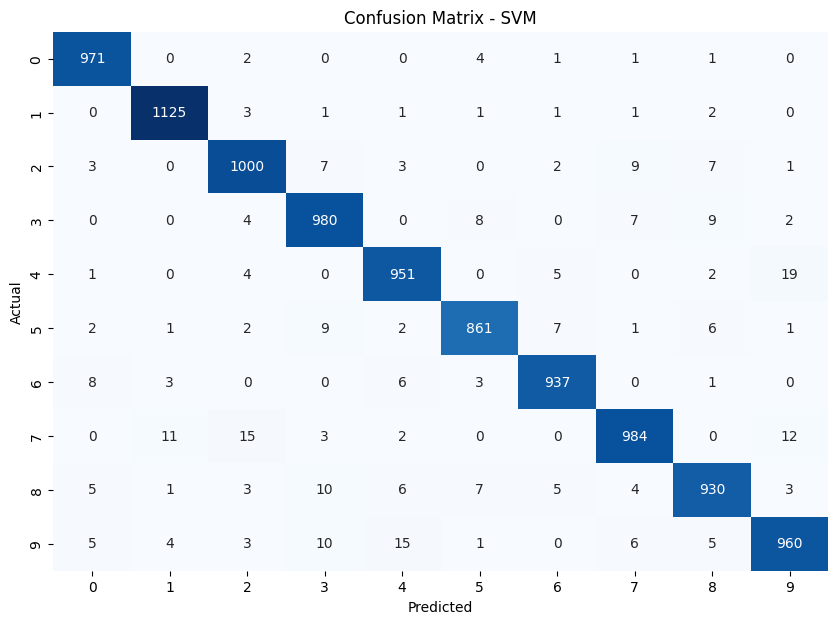

In [5]:
# Save classification report and confusion matrix in the results folder
utils.save_classification_report(class_report, 'results/classification_report.txt')

# Save confusion matrix as a heatmap image
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('results/confusion_matrix.png')
plt.show()


In [6]:
# Optional: Save predictions to CSV for further analysis
test_predictions_df = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_pred})
test_predictions_df.to_csv('results/test_predictions.csv', index=False)

# Optional: Validation accuracy
accuracy = np.mean(y_test == y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Save accuracy to a text file
with open('results/validation_accuracy.txt', 'w') as f:
    f.write(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.9700


In [7]:
!pip install shap

  Using cached slicer-0.0.7-py3-none-any.whl.metadata (3.7 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
   ---------------------------------------- 0.0/450.3 kB ? eta -:--:--
   --- ------------------------------------ 41.0/450.3 kB 1.9 MB/s eta 0:00:01
   --- ------------------------------------ 41.0/450.3 kB 1.9 MB/s eta 0:00:01
   ------- ------------------------------- 92.2/450.3 kB 655.4 kB/s eta 0:00:01
   ------------- -------------------------- 153.6/450.3 kB 1.0 MB/s eta 0:00:01
   ------------- -------------------------- 153.6/450.3 kB 1.0 MB/s eta 0:00:01
   ------------- -------------------------- 153.6/450.3 kB 1.0 MB/s eta 0:00:01
   ------------- -------------------------- 153.6/450.3 kB 1.0 MB/s eta 0:00:01
   ------------- -------------------------- 153.6/450.3 kB 1.0 MB/s eta 0:00:01
   ------------- -------------------------- 153.6/450.3 kB 1.0 MB/s eta 0:00:01
   ------------------- ------------------ 225.3/450.3 kB 430.1 kB/s eta 0:00:01



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\frany\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import shap 

In [11]:
svm_model

SVC()

In [25]:
# Create SHAP explainer
explainer = shap.KernelExplainer(svm_model.predict, X_train[:5])  # Limit sample size for efficiency

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test[:5])


  0%|          | 0/5 [00:00<?, ?it/s]

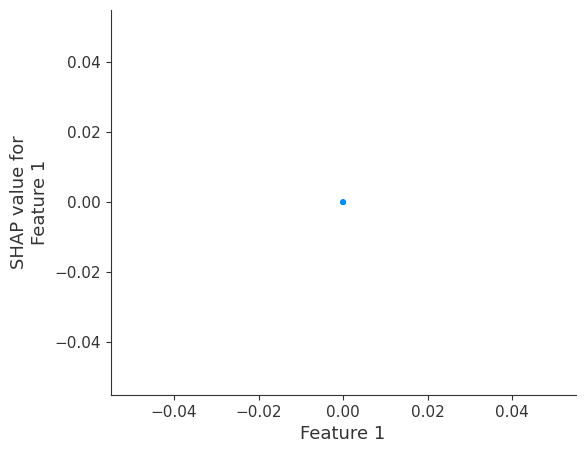

In [31]:
# SHAP dependence plot for a specific feature
feature_names = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5']

shap.dependence_plot(0, shap_values, X_test[:5], feature_names=feature_names)  # Feature index 0 (change as needed)


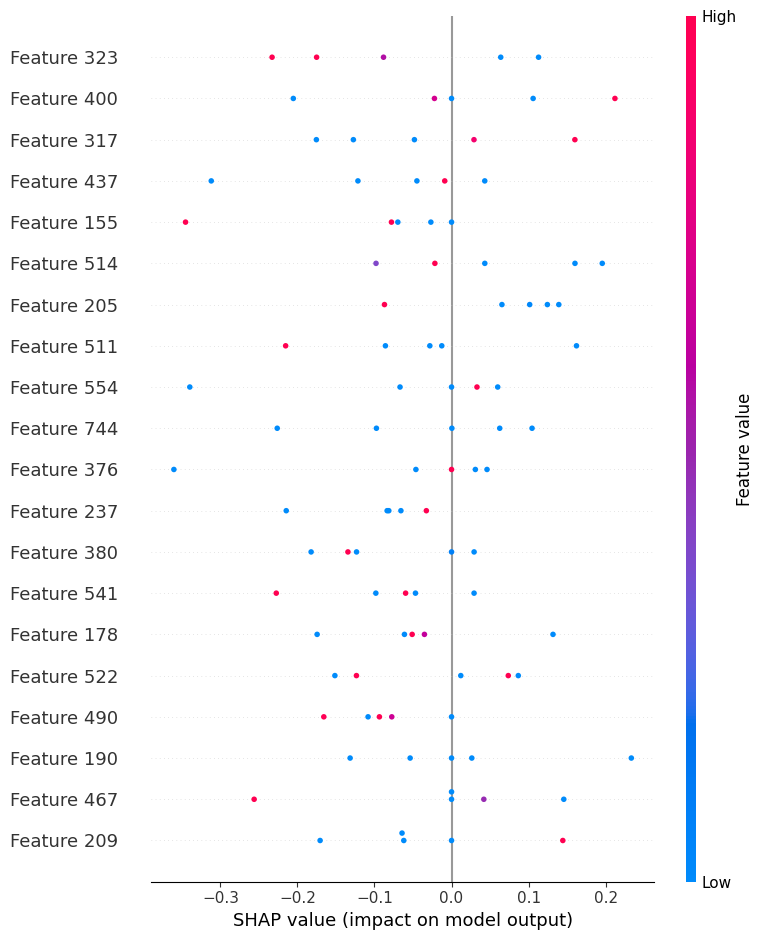

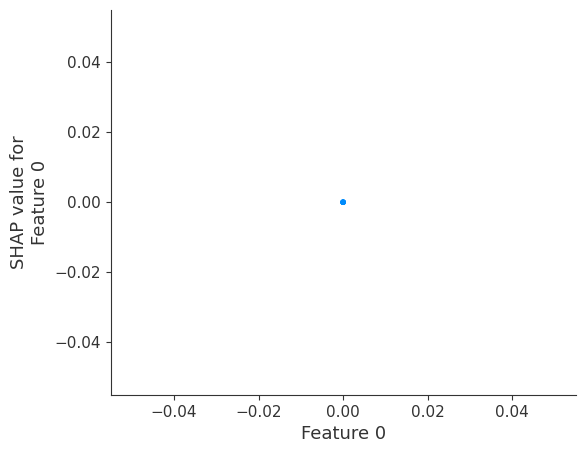

In [43]:
import matplotlib.pyplot as plt

# Save SHAP summary plot
shap.summary_plot(shap_values, X_test[:5], show=False)
plt.savefig('results/shap_summary_plot.png')

# Save SHAP dependence plot for a specific feature
shap.dependence_plot(0, shap_values, X_test[:5], show=False)
plt.savefig('results/shap_dependence_plot_feature_0.png')


In [34]:
# Inicializar las dependencias de JavaScript para SHAP
shap.initjs()

In [35]:
# SHAP force plot for a single prediction
shap.force_plot(explainer.expected_value, shap_values[0], X_test[0], feature_names=feature_names)


In [38]:
# Create SHAP explainer
explainer = shap.KernelExplainer(svm_model.predict, X_train[:5])  # Limit sample size for efficiency

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test[:5])


  0%|          | 0/5 [00:00<?, ?it/s]

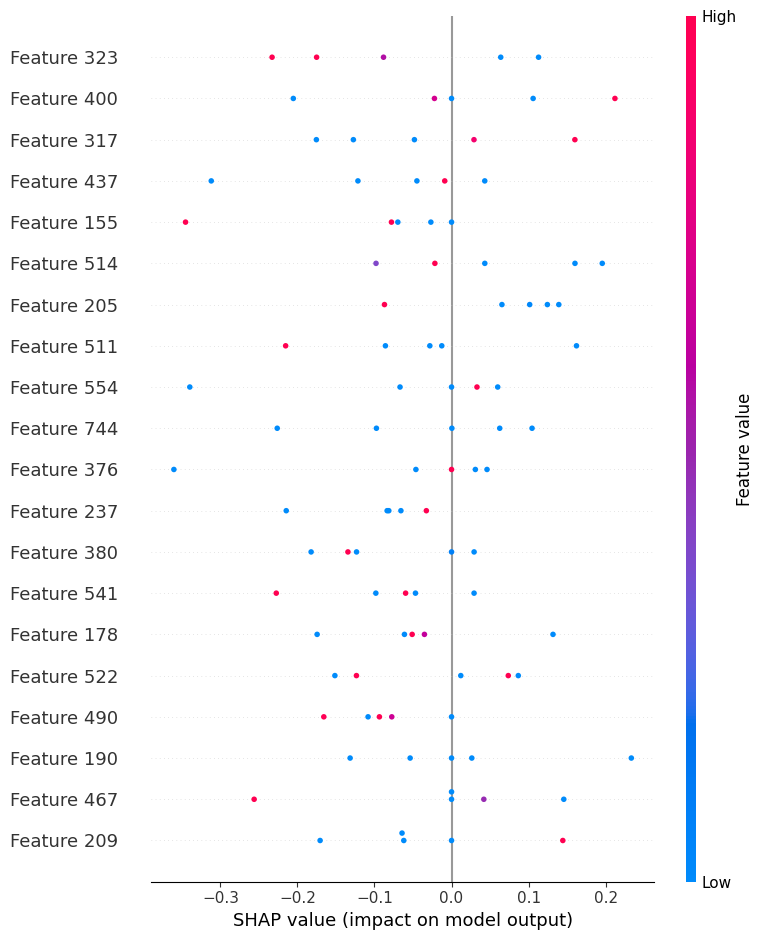

In [44]:
# Generar el gráfico resumen de SHAP
feature_names = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5']

shap.summary_plot(shap_values, X_test[:5]) #, feature_names=feature_names)


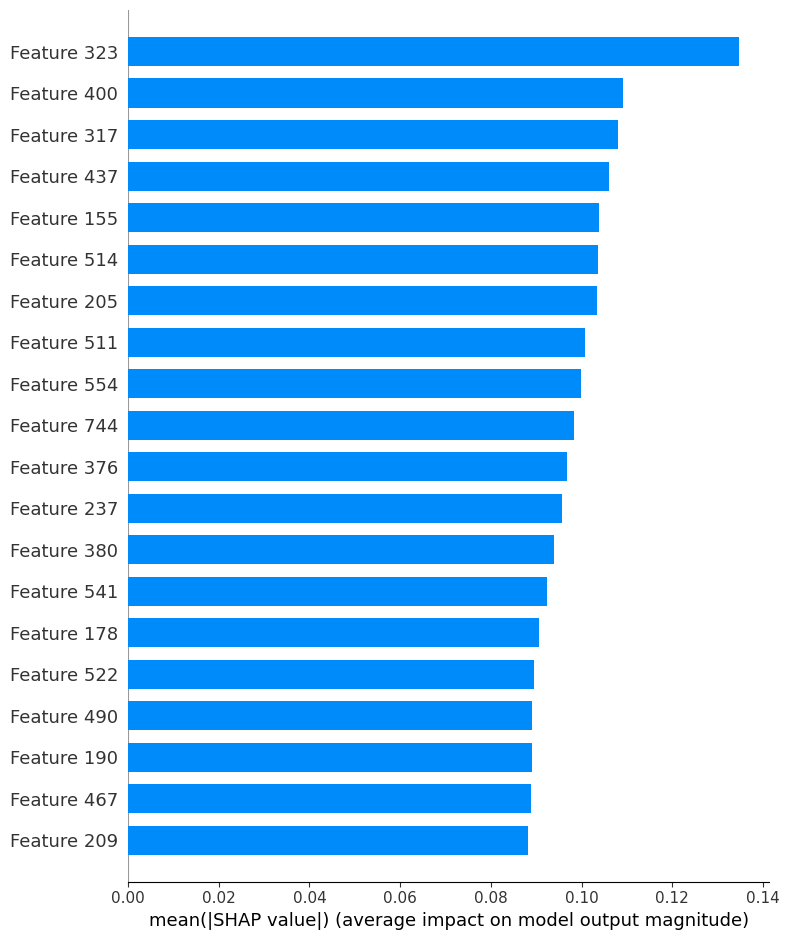

In [45]:
# Generar gráfico de barras de importancia de características
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [58]:
# Convertir los valores a tipos de Python nativos (lista de floats)
sample_data = X_test[0].astype(float).tolist()

# Graficar el gráfico de fuerzas para una muestra en particular
shap.force_plot(explainer.expected_value, shap_values[0], sample_data)

In [73]:
explainer = shap.KernelExplainer(svm_model.predict, X_train)

# Graficar el gráfico de cascada para una muestra en particular
# shap.waterfall_plot(shap_values[0][0])



Using 19999 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [74]:
# Selecciona una muestra para la explicación
X_sample = X_train[[0]]  # Solo la primera muestra

# Obtener los valores SHAP
shap_values = explainer.shap_values(X_sample)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Graficar el gráfico de cascada
shap.waterfall_plot(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_sample.iloc[0]))

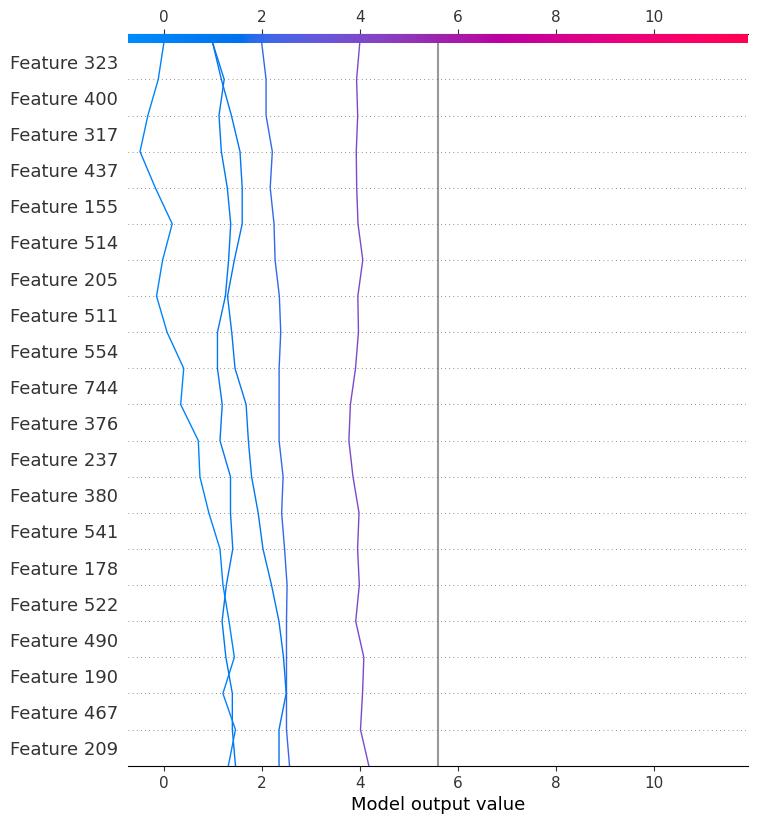

In [56]:
# Graficar el gráfico de decisión para varias muestras
shap.decision_plot(explainer.expected_value, shap_values, X_test)
